# Appendix IX: Residuals Distribution Plots

In [1]:
"""Imports necessary packages"""

import itertools
import math
from typing import Dict, Iterable, List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

In [2]:
def make_qq_dist(data: Iterable, var_name: str, xlim_min: Union[int, float, None] = None, xlim_max: Union[int, float, None] = None, mdl: Union[str, None] = None) -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    if mdl:
        fig.suptitle('The distribution of %s in `%s`' % (var_name, mdl))
    else:
        fig.suptitle('The distribution of %s' % var_name)

    stats.probplot(data, dist="norm", plot=ax1)
    ax1.set_title("A Q-Q plot of %s" % var_name)

    sns.distplot(data, ax=ax2)
    if not isinstance(xlim_min, type(None)):
        if not isinstance(xlim_max, type(None)):
            ax2.set_xlim(xlim_min, xlim_max)
    ax2.set_xlabel(var_name)
    ax2.set_ylabel("probability")
    ax2.set_title("A distplot of %s" % var_name)

    plt.show()

In [3]:
data = pd.read_csv("D:/School/frequentist-statistics/ITM-song-popularity/database/itm_songs_preprocessed.csv")
data = data.drop("Unnamed: 0", axis=1)

In [4]:
models = ["popularity_abs ~ age_days + complexity + track_number", "popularity_norm ~ age_days + complexity + track_number", "popularity_abs ~ age_days + complexity + track_number + track_number*duration + danceability + duration", "popularity_norm ~ age_days + complexity + track_number + track_number*duration + danceability + duration", "popularity_abs ~ track_number + duration + danceability + age_days", "popularity_norm ~ track_number + duration + danceability + age_days", "popularity_abs ~ track_number + duration + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity", "popularity_norm ~ track_number + duration + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity"]

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


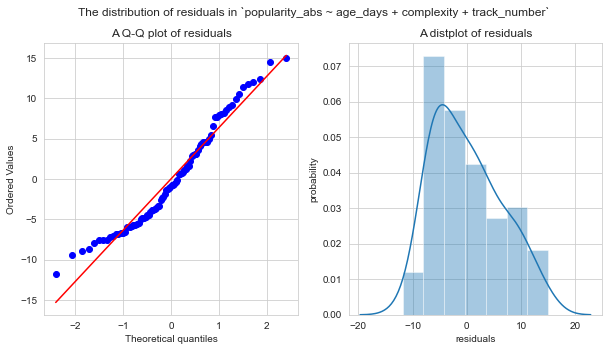

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


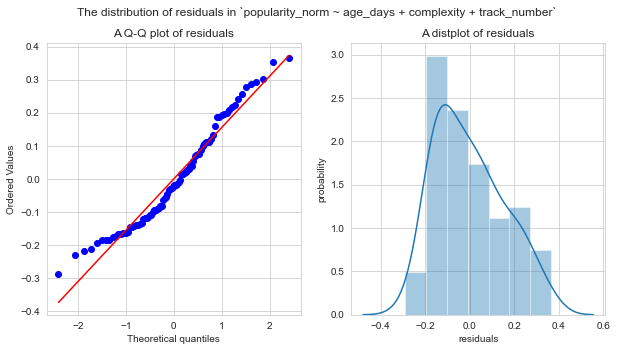

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


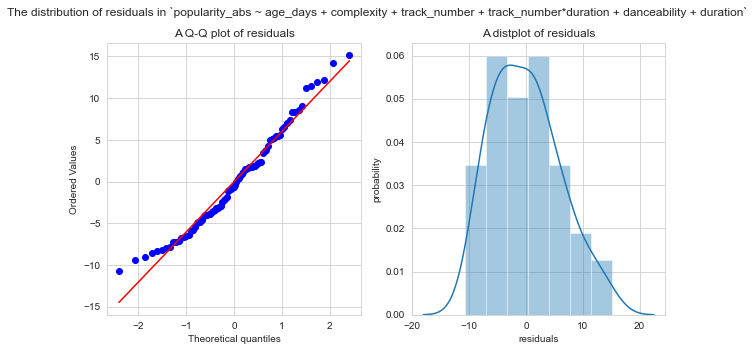

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


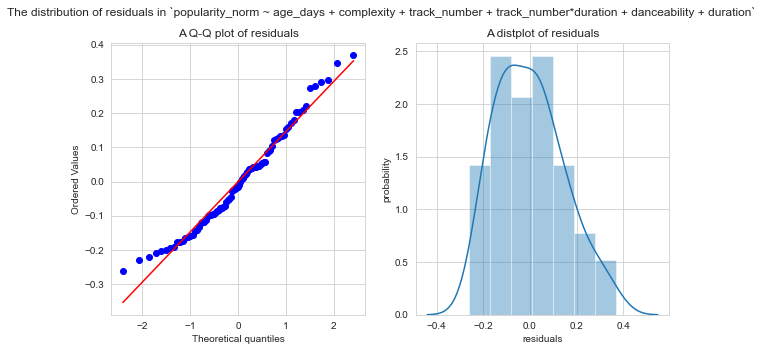

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


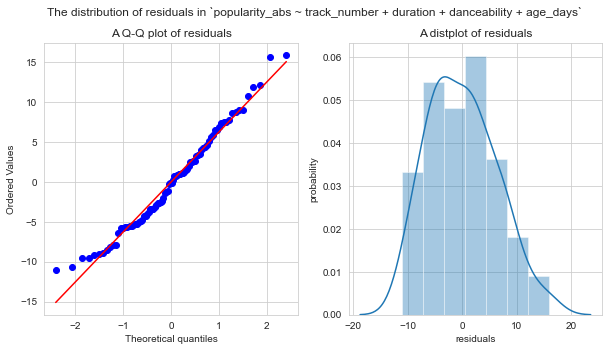

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


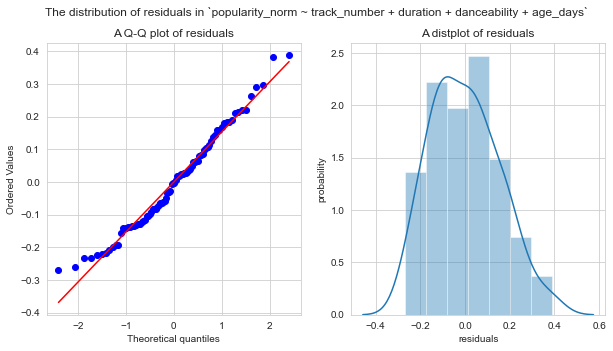

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


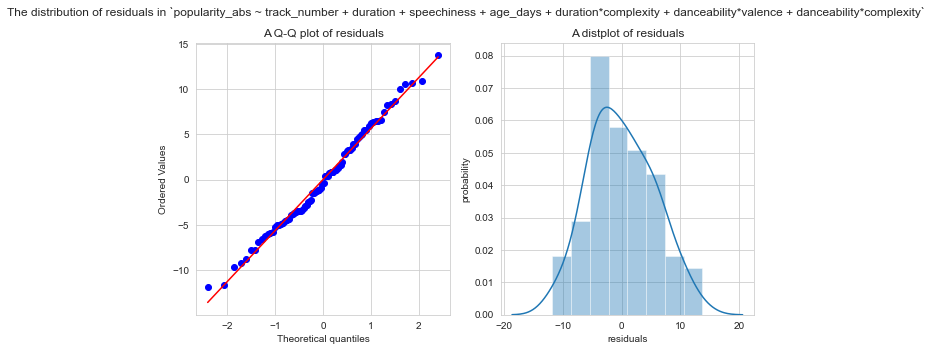

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


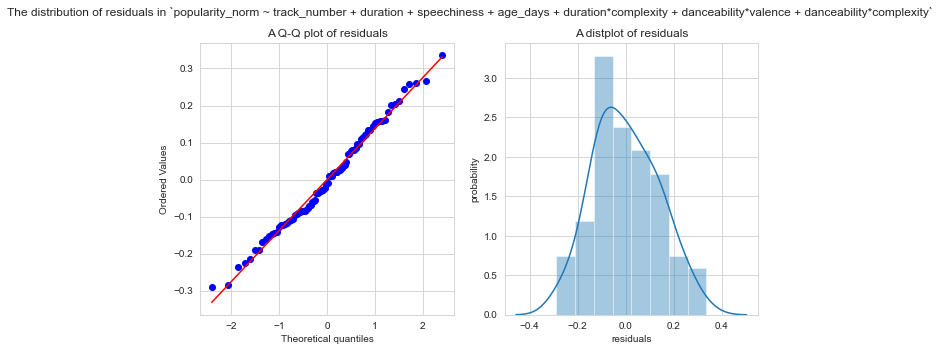

In [5]:
for model_str in models:
    model = sm.formula.ols(model_str, data=data).fit()
    make_qq_dist(model.resid, "residuals", mdl=model_str)